In [54]:
import requests
import xmltodict
import csv
import time
from requests.exceptions import ConnectionError, Timeout

ARXIV_API_URL = "http://export.arxiv.org/api/query?"
MAX_RESULTS_PER_QUERY = 300 
RETRY_LIMIT = 5 

def fetch_arxiv_papers(query, start_index=0, max_results=100):
    """Fetches a batch of papers from arXiv API with retry logic."""
    if max_results > MAX_RESULTS_PER_QUERY:
        max_results = MAX_RESULTS_PER_QUERY  

    query_url = f"{ARXIV_API_URL}search_query={query}&start={start_index}&max_results={max_results}"
    headers = {'User-Agent': 'arxiv-fetch-script/1.0'}
    
    retry_count = 0
    while retry_count < RETRY_LIMIT:
        try:
            response = requests.get(query_url, headers=headers, timeout=10)
            
            if response.status_code == 200:
                papers_data = xmltodict.parse(response.text)
                if 'entry' in papers_data['feed']:
                    return papers_data['feed']['entry']
                else:
                    return []
            else:
                print(f"Failed to retrieve papers: {response.status_code}")
                return []
        
        except (ConnectionError, Timeout) as e:
            print(f"Connection error: {e}. Retrying {retry_count + 1}/{RETRY_LIMIT}...")
            retry_count += 1
            time.sleep(2 ** retry_count) 

    print("Max retries reached. Exiting.")
    return []

def extract_paper_details(paper):
    """Extracts details of a single paper."""
    authors = [author['name'] for author in paper.get('author', [])] if isinstance(paper.get('author'), list) else [paper.get('author', {}).get('name', '')]

    arxiv_id = paper.get('id', '').split('/')[-1]
    
    return {
        'arxiv_id': arxiv_id,
        'title': paper.get('title', None),
        'authors': authors,
        'summary': paper.get('summary', None),
        'published': paper.get('published', None),
        'arxiv_abstract_url': paper.get('id', None),
        'arxiv_pdf_url': paper.get('link', [])[1].get('@href', None) 
    }

def build_arxiv_corpus(query, max_results=1000, delay=3):
    """Builds the corpus of arXiv papers for a given query, respecting API limits."""
    corpus = []
    start_index = 0

    while start_index < max_results:
        print(f"Fetching papers {start_index} to {start_index + MAX_RESULTS_PER_QUERY}...")

        # Fetch batch of papers
        papers = fetch_arxiv_papers(query, start_index=start_index, max_results=MAX_RESULTS_PER_QUERY)
        
        if not papers:
            break

        for paper in papers:
            try:
                paper_details = extract_paper_details(paper)
                corpus.append(paper_details)
            except Exception as e:
                print(f"Error extracting paper details: {e}")
                continue
        
        start_index += MAX_RESULTS_PER_QUERY
        time.sleep(delay)

    return corpus

def save_corpus_to_csv(corpus, filename):
    """Saves the corpus to a CSV file."""
    headers = ['arxiv_id', 'title', 'authors', 'summary', 'published', 'arxiv_abstract_url', 'arxiv_pdf_url']
    
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader() 
        for paper in corpus:
            writer.writerow(paper)

In [52]:
query_terms = [
    "machine learning",
    "artificial intelligence",
    "natural language processing",
    "deep learning",
    "reinforcement learning",
    "supervised learning",
    "unsupervised learning",
    "semi-supervised learning",
    "transfer learning",
    "self-supervised learning",
    "generative adversarial networks",
    "convolutional neural networks",
    "recurrent neural networks",
    "transformers",
    "few-shot learning",
    "meta learning",
    "bayesian neural networks",
    "autoencoders",
    "graph neural networks",
    "federated learning",
    "multi-task learning",
    "artificial general intelligence",
    "explainable AI",
    "AI ethics",
    "AI in healthcare",
    "AI in robotics",
    "AI in autonomous vehicles",
    "AI for cybersecurity",
    "AI for education",
    "AI for social good",
    "language models",
    "word embeddings",
    "sentence embeddings",
    "named entity recognition",
    "sentiment analysis",
    "text classification",
    "machine translation",
    "text summarization",
    "question answering",
    "information retrieval",
    "text generation",
    "language model fine-tuning",
    "BERT",
    "GPT",
    "multilingual NLP",
    "speech recognition",
    "speech synthesis",
    "natural language understanding",
    "natural language inference",
    "zero-shot learning in NLP",
    "few-shot learning in NLP",
    "computer vision",
    "AI in drug discovery",
    "AI in finance",
    "AI for climate change",
    "data augmentation",
    "synthetic data generation",
    "backpropagation",
    "stochastic gradient descent",
    "attention mechanism",
    "self-attention",
    "graph embeddings",
    "hyperparameter tuning",
    "neural architecture search",
    "regularization in machine learning",
    "NeurIPS",
    "ICLR",
    "ACL",
    "EMNLP",
    "AAAI",
    "IJCAI",
    "ICML",
    "CVPR",
    "few-shot learning with transformers",
    "large language models",
    "multi-modal learning",
    "vision-language pre-training",
    "AI for human-computer interaction",
    "ethical considerations in AI",
    "LLMs in healthcare applications"
]

In [55]:
for i, query in enumerate(query_terms):
    corpus = build_arxiv_corpus(query, max_results=10000)
    save_corpus_to_csv(corpus, f'arxiv_corpus_{i}.csv')
    print(f"Corpus of {len(corpus)} papers related to {query} has been saved to 'arxiv_corpus_{i}.csv'.")

Fetching papers 0 to 300...
Fetching papers 300 to 600...
Fetching papers 600 to 900...
Fetching papers 900 to 1200...
Fetching papers 1200 to 1500...
Corpus of 1200 papers related to machine learning has been saved to 'arxiv_corpus_0.csv'.
Fetching papers 0 to 300...
Fetching papers 300 to 600...
Fetching papers 600 to 900...
Fetching papers 900 to 1200...
Fetching papers 1200 to 1500...
Fetching papers 1500 to 1800...
Fetching papers 1800 to 2100...
Fetching papers 2100 to 2400...
Fetching papers 2400 to 2700...
Fetching papers 2700 to 3000...
Corpus of 2700 papers related to artificial intelligence has been saved to 'arxiv_corpus_1.csv'.
Fetching papers 0 to 300...
Fetching papers 300 to 600...
Fetching papers 600 to 900...
Corpus of 400 papers related to natural language processing has been saved to 'arxiv_corpus_2.csv'.
Fetching papers 0 to 300...
Fetching papers 300 to 600...
Fetching papers 600 to 900...
Fetching papers 900 to 1200...
Fetching papers 1200 to 1500...
Corpus of 12

Fetching papers 300 to 600...
Corpus of 100 papers related to AI for social good has been saved to 'arxiv_corpus_29.csv'.
Fetching papers 0 to 300...
Fetching papers 300 to 600...
Fetching papers 600 to 900...
Corpus of 600 papers related to language models has been saved to 'arxiv_corpus_30.csv'.
Fetching papers 0 to 300...
Fetching papers 300 to 600...
Fetching papers 600 to 900...
Fetching papers 900 to 1200...
Fetching papers 1200 to 1500...
Fetching papers 1500 to 1800...
Fetching papers 1800 to 2100...
Fetching papers 2100 to 2400...
Fetching papers 2400 to 2700...
Fetching papers 2700 to 3000...
Fetching papers 3000 to 3300...
Fetching papers 3300 to 3600...
Fetching papers 3600 to 3900...
Fetching papers 3900 to 4200...
Fetching papers 4200 to 4500...
Fetching papers 4500 to 4800...
Fetching papers 4800 to 5100...
Corpus of 4800 papers related to word embeddings has been saved to 'arxiv_corpus_31.csv'.
Fetching papers 0 to 300...
Fetching papers 300 to 600...
Fetching papers 60

Fetching papers 900 to 1200...
Corpus of 700 papers related to data augmentation has been saved to 'arxiv_corpus_55.csv'.
Fetching papers 0 to 300...
Fetching papers 300 to 600...
Fetching papers 600 to 900...
Corpus of 600 papers related to synthetic data generation has been saved to 'arxiv_corpus_56.csv'.
Fetching papers 0 to 300...
Fetching papers 300 to 600...
Fetching papers 600 to 900...
Fetching papers 900 to 1200...
Fetching papers 1200 to 1500...
Fetching papers 1500 to 1800...
Fetching papers 1800 to 2100...
Fetching papers 2100 to 2400...
Fetching papers 2400 to 2700...
Fetching papers 2700 to 3000...
Corpus of 2404 papers related to backpropagation has been saved to 'arxiv_corpus_57.csv'.
Fetching papers 0 to 300...
Fetching papers 300 to 600...
Fetching papers 600 to 900...
Fetching papers 900 to 1200...
Fetching papers 1200 to 1500...
Fetching papers 1500 to 1800...
Fetching papers 1800 to 2100...
Fetching papers 2100 to 2400...
Fetching papers 2400 to 2700...
Corpus of 2

In [74]:
import pandas as pd
df_l = []
retry_queries_list = []
df_len_l = []
for i, query in enumerate(query_terms):
    df = pd.read_csv(f'arxiv_corpus_{i}.csv')
    if df.shape[0] > 0:
        df_l.append(df)
        df_len_l.append(df.shape[0])
    else:
        retry_queries_list.append(query)


In [71]:
df_mrgd = pd.concat(df_l, ignore_index=True)
df_mrgd.shape

(121076, 7)

In [72]:
df_mrgd['arxiv_id'].nunique()

92756

In [88]:
df_mrgd = df_mrgd.drop_duplicates()

(array([32., 18.,  5., 10.,  3.,  8.,  0.,  2.,  1.,  1.]),
 array([  19. ,  672.7, 1326.4, 1980.1, 2633.8, 3287.5, 3941.2, 4594.9,
        5248.6, 5902.3, 6556. ]),
 <BarContainer object of 10 artists>)

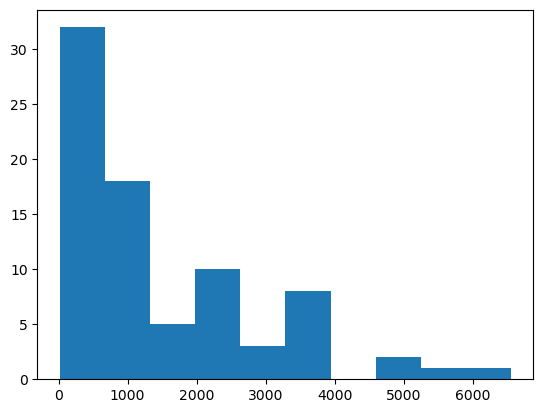

In [78]:
import matplotlib.pyplot as plt
plt.hist(df_len_l)

In [89]:
df_mrgd.to_csv("compiled_papers.csv")

In [81]:
df_mrgd

,arxiv_id,title,authors,summary,published,arxiv_abstract_url,arxiv_pdf_url
0,1909.03550v1,Lecture Notes: Optimization for Machine Learning,['Elad Hazan'],Lecture notes on optimization for machine lear...,2019-09-08T21:49:42Z,http://arxiv.org/abs/1909.03550v1,http://arxiv.org/pdf/1909.03550v1
1,1811.04422v1,An Optimal Control View of Adversarial Machine...,['Xiaojin Zhu'],I describe an optimal control view of adversar...,2018-11-11T14:28:34Z,http://arxiv.org/abs/1811.04422v1,http://arxiv.org/pdf/1811.04422v1
2,1707.04849v1,Minimax deviation strategies for machine learn...,"['Michail Schlesinger', 'Evgeniy Vodolazskiy']",The article is devoted to the problem of small...,2017-07-16T09:15:08Z,http://arxiv.org/abs/1707.04849v1,http://arxiv.org/pdf/1707.04849v1
3,1909.09246v1,Machine Learning for Clinical Predictive Analy...,['Wei-Hung Weng'],"In this chapter, we provide a brief overview o...",2019-09-19T22:02:00Z,http://arxiv.org/abs/1909.09246v1,http://arxiv.org/pdf/1909.09246v1
4,2301.09753v1,Towards Modular Machine Learning Solution Deve...,"['Samiyuru Menik', 'Lakshmish Ramaswamy']",Machine learning technologies have demonstrate...,2023-01-23T22:54:34Z,http://arxiv.org/abs/2301.09753v1,http://arxiv.org/pdf/2301.09753v1
...,...,...,...,...,...,...,...
121071,2302.08500v2,Auditing large language models: a three-layere...,"['Jakob Mökander', 'Jonas Schuett', 'Hannah Ro...",Large language models (LLMs) represent a major...,2023-02-16T18:55:21Z,http://arxiv.org/abs/2302.08500v2,http://arxiv.org/abs/2302.08500v2
121072,2405.14804v1,Can LLMs Solve longer Math Word Problems Better?,"['Xin Xu', 'Tong Xiao', 'Zitong Chao', 'Zhenya...",Math Word Problems (MWPs) are crucial for eval...,2024-05-23T17:13:50Z,http://arxiv.org/abs/2405.14804v1,http://arxiv.org/pdf/2405.14804v1
121073,2402.12991v2,TRAP: Targeted Random Adversarial Prompt Honey...,"['Martin Gubri', 'Dennis Ulmer', 'Hwaran Lee',...",Large Language Model (LLM) services and models...,2024-02-20T13:20:39Z,http://arxiv.org/abs/2402.12991v2,http://arxiv.org/pdf/2402.12991v2
121074,2407.10457v1,"The Good, The Bad, and The Greedy: Evaluation ...","['Yifan Song', 'Guoyin Wang', 'Sujian Li', 'Bi...",Current evaluations of large language models (...,2024-07-15T06:12:17Z,http://arxiv.org/abs/2407.10457v1,http://arxiv.org/pdf/2407.10457v1


## Get citations for the arxiv papers

In [82]:
arxiv_id = "1909.03550v1"  

api_url = f"https://export.arxiv.org/api/query?id_list={arxiv_id}"

response = requests.get(api_url)
if response.status_code == 200:


    data = response.text


else:

    print("Error fetching arXiv data")


In [86]:
print(data)

<?xml version="1.0" encoding="UTF-8"?>
<feed xmlns="http://www.w3.org/2005/Atom">
  <link href="http://arxiv.org/api/query?search_query%3D%26id_list%3D1909.03550v1%26start%3D0%26max_results%3D10" rel="self" type="application/atom+xml"/>
  <title type="html">ArXiv Query: search_query=&amp;id_list=1909.03550v1&amp;start=0&amp;max_results=10</title>
  <id>http://arxiv.org/api//xjuFX9oXDdEfd3WdnEfmI2/6aY</id>
  <updated>2024-10-20T00:00:00-04:00</updated>
  <opensearch:totalResults xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">1</opensearch:totalResults>
  <opensearch:startIndex xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">0</opensearch:startIndex>
  <opensearch:itemsPerPage xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">10</opensearch:itemsPerPage>
  <entry>
    <id>http://arxiv.org/abs/1909.03550v1</id>
    <updated>2019-09-08T21:49:42Z</updated>
    <published>2019-09-08T21:49:42Z</published>
    <title>Lecture Notes: Optimization for Machine Learning</titl